# Prediction model for Predicting Price

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1--> Import Dataset
#### Changed the file format to uft (comma delimitter)

In [2]:
df = pd.read_csv("Toyota_Corolla.csv")
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
df_toyota = df.iloc[:, [2,3,6,8,12,13,15,16,17]]
df_toyota

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


### 2--> EDA 

In [4]:
df_toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [5]:
df_toyota.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [6]:
df1_toyota = df_toyota.rename({'Age_08_04':'Age','Quarterly_Tax':'QT'},axis =1)
df1_toyota

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
# check for duplicate rows
df1_toyota[df1_toyota.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [8]:
df1_toyota = df1_toyota.drop_duplicates().reset_index(drop=True)
df1_toyota

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [9]:
df1_toyota.describe()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


### 3--> Correlation analysis

In [10]:
import seaborn as sns

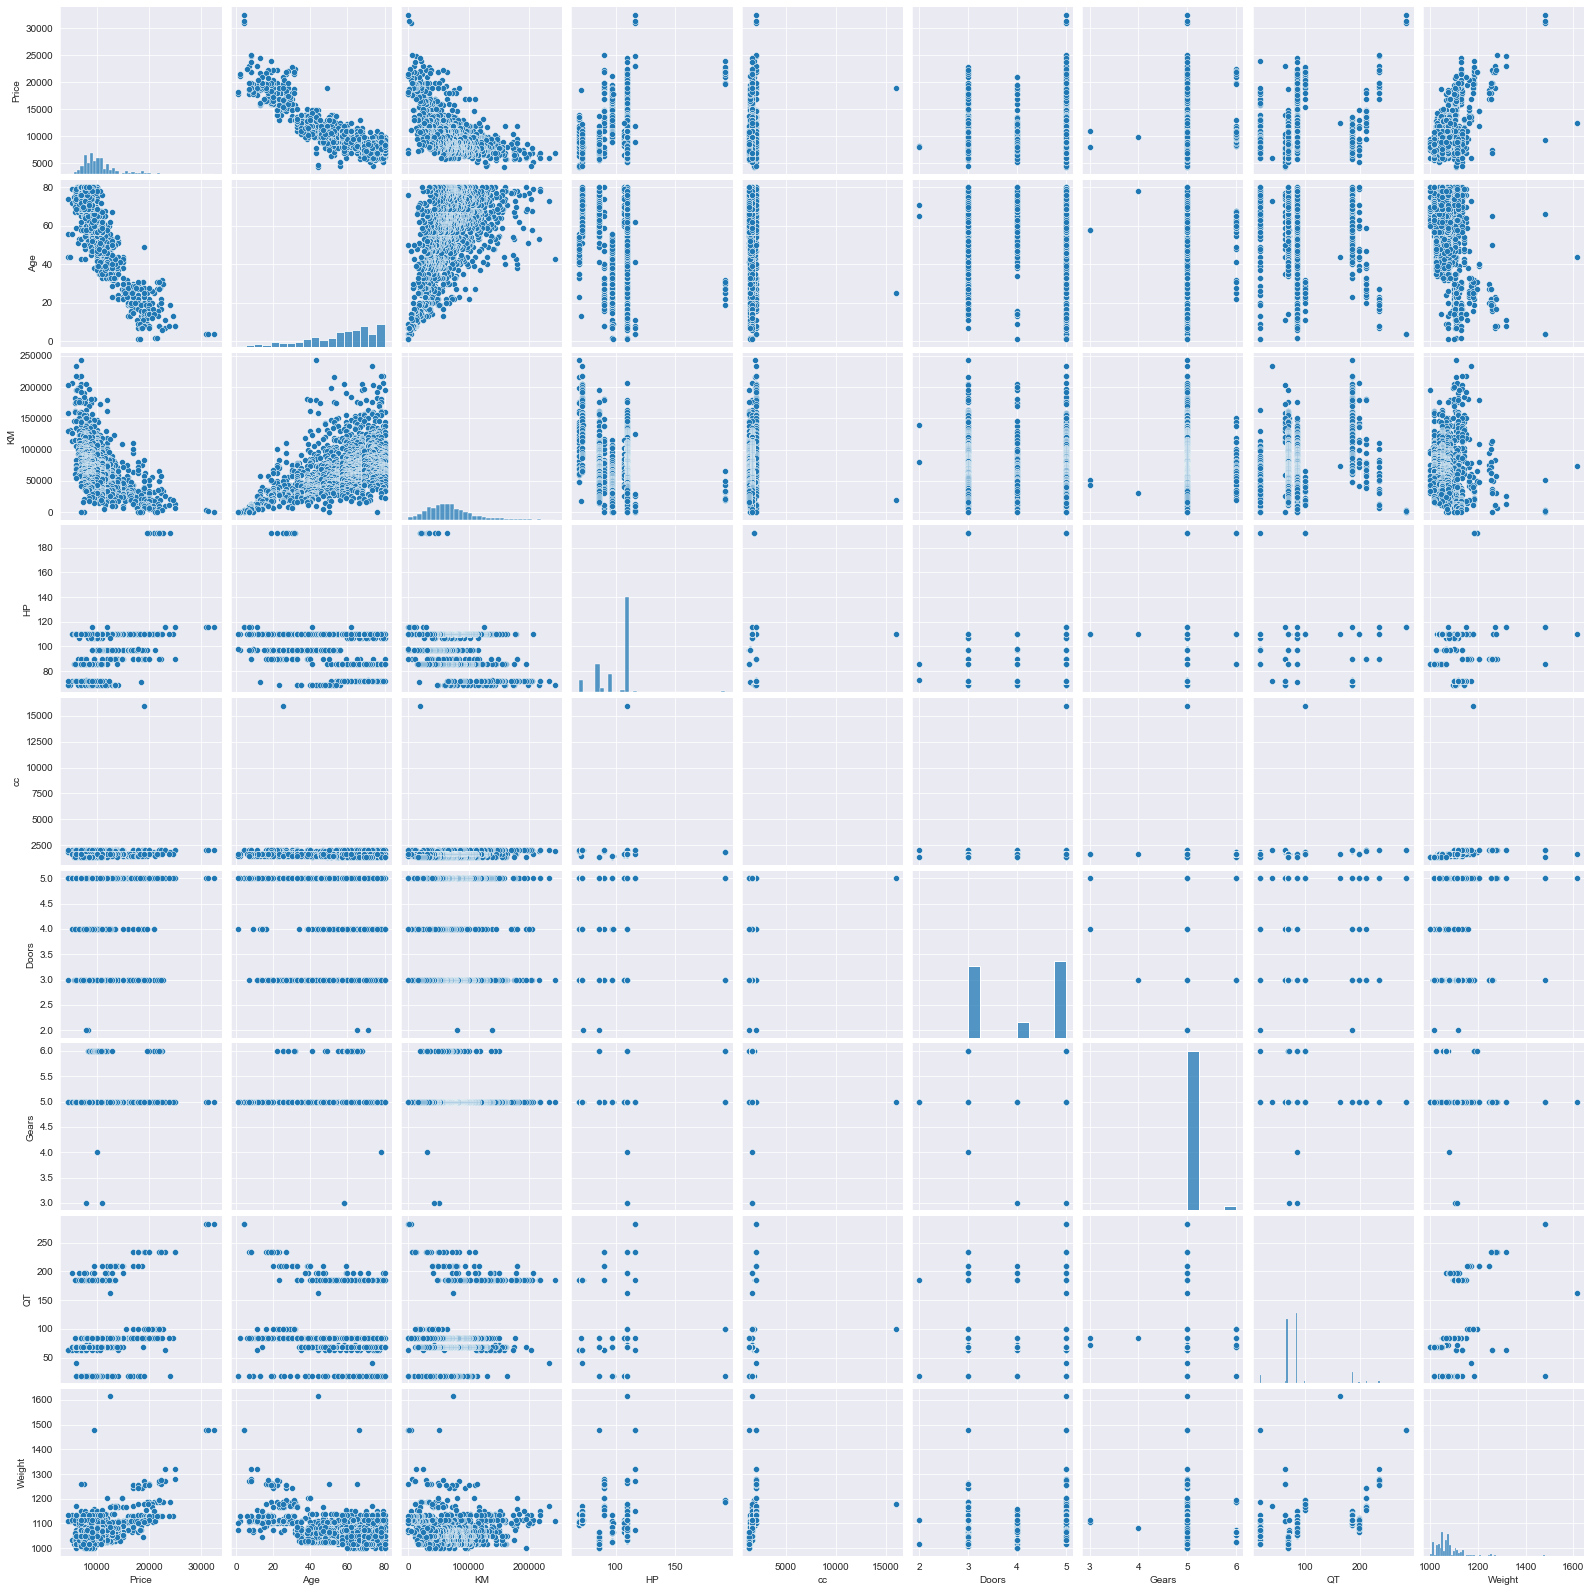

In [11]:
# scatter plots for all the variables

sns.set_style(style = 'darkgrid')
sns.pairplot(df1_toyota)

In [12]:
df1_toyota.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


### 4--> preparing a model

In [13]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data = df1_toyota).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:12:09   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 5-->  Model testing

In [14]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [15]:
# t and p-values
print(model.tvalues,'\n',model.pvalues)

Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
cc           -1.316436
Doors        -0.023012
Gears         3.034563
QT            2.944198
Weight       15.760663
dtype: float64 
 Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
cc            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QT            3.290363e-03
Weight        1.031118e-51
dtype: float64


In [16]:
# R squared values
(model.rsquared,model.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

#### Builind SLR --> Simple linear regression and MLR--> Multiple Linear Regression models for the insignificant variables --> "cc" and "Doors"

In [17]:
slr_c=smf.ols('Price~ cc',data =df1_toyota).fit()
slr_c.tvalues , slr_c.pvalues # cc has significant pvalue


(Intercept    24.879592
 cc            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 cc            2.292856e-06
 dtype: float64)

In [18]:
slr_c=smf.ols('Price~ Doors',data =df1_toyota).fit()
slr_c.tvalues , slr_c.pvalues # Doors has significant pvalue

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [19]:
slr_c=smf.ols('Price~ cc + Doors',data =df1_toyota).fit()
slr_c.tvalues , slr_c.pvalues # cc and Doors has significant pvalue


(Intercept    12.786341
 cc            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 cc           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

# 6--> Model Validation Techniques:
### *Two techniques*
#### 1) Collinearity check 
#### 2) Residual Analysis

In [20]:
# 1) Colinearity Problem Check .
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_Age = smf.ols('Age~KM+HP+cc+Doors+Gears+QT+Weight',data = df1_toyota).fit().rsquared
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age+HP+cc+Doors+Gears+QT+Weight',data = df1_toyota).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age+KM+cc+Doors+Gears+QT+Weight',data = df1_toyota).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_Doors = smf.ols('Doors~HP+KM+Age+cc+Gears+QT+Weight',data = df1_toyota).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

rsq_cc = smf.ols('cc~Doors+HP+KM+Age+Gears+QT+Weight',data = df1_toyota).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_Gears = smf.ols('Gears~Doors+KM+HP+Age+cc+QT+Weight',data = df1_toyota).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

rsq_QT = smf.ols('QT~Gears+Doors+KM+HP+Age+cc+Weight',data = df1_toyota).fit().rsquared
vif_QT = 1/(1-rsq_QT)

rsq_Weight = smf.ols('Weight~QT+Gears+Doors+KM+HP+Age+cc',data = df1_toyota).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)

d1 = {'Variables': ['Age','KM','HP','Doors','cc','Gears','QT','Weight'], 'VIF':[vif_Age,vif_KM,vif_HP,vif_Doors,vif_cc,vif_Gears,vif_QT,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,Doors,1.155890
4,cc,1.163470
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [21]:
# None variable has VIF>20 --> No Collinearity
# So, consider all varaibles in Regression equation.

### 6.2--> Residual Analysis

C:\Users\Shubham Raut\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


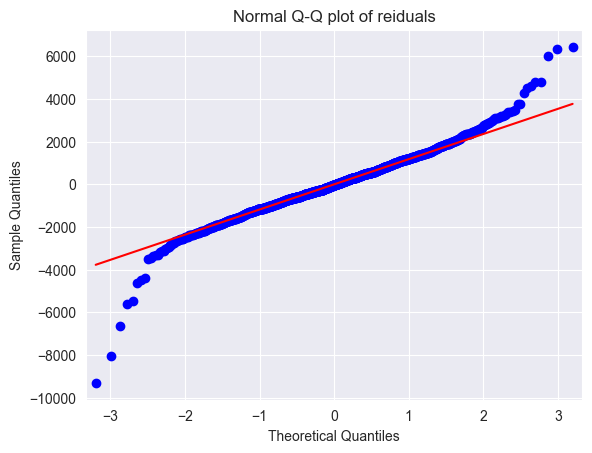

In [22]:
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line ='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of reiduals")
plt.show()

In [23]:
list(np.where(model.resid > 5000))

[array([109, 146, 522], dtype=int64)]

In [24]:
list(np.where(model.resid < -5000))

[array([190, 191, 220, 600, 959], dtype=int64)]

In [25]:
# Residual Plot for Homoscedasticity:
def get_standardized_values (vals):
    return (vals - vals.mean())/vals.std()

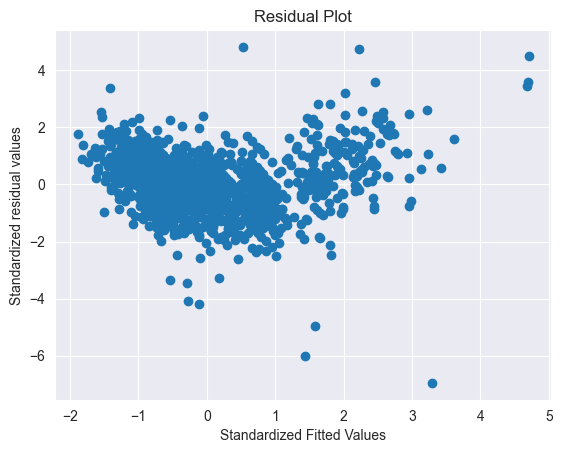

In [26]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized residual values')
plt.show()


In [27]:
# Test for Residual vs Regressors
# Or for independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)   
# exog = x-variable & endog = y-variable

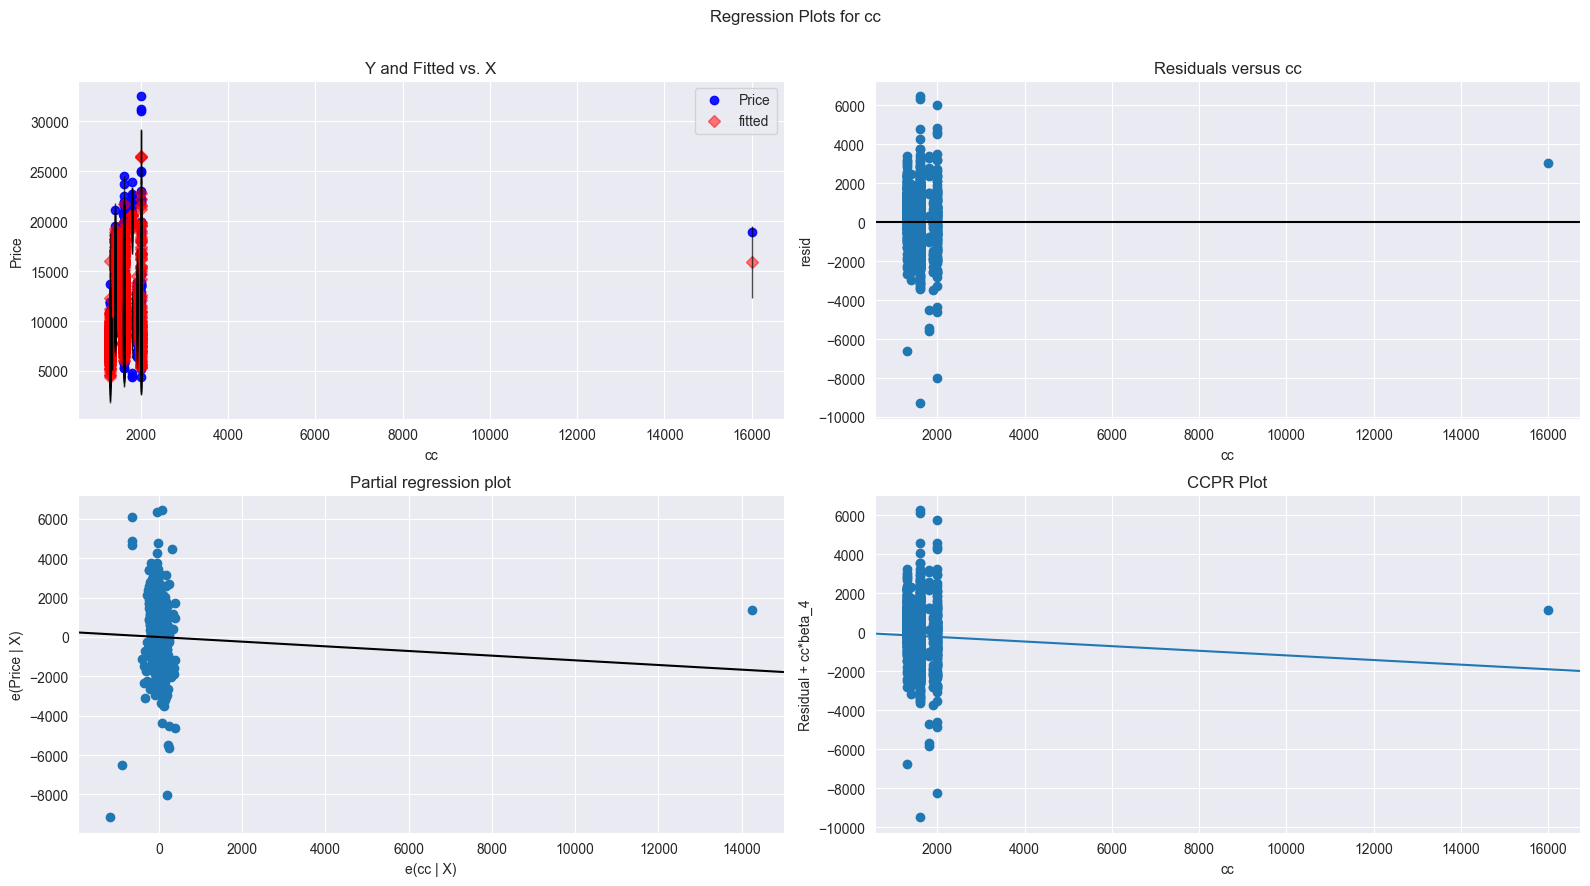

In [28]:
fig = plt.figure(figsize = (16,9))
fig = sm.graphics.plot_regress_exog(model,"cc", fig = fig )
plt.show()

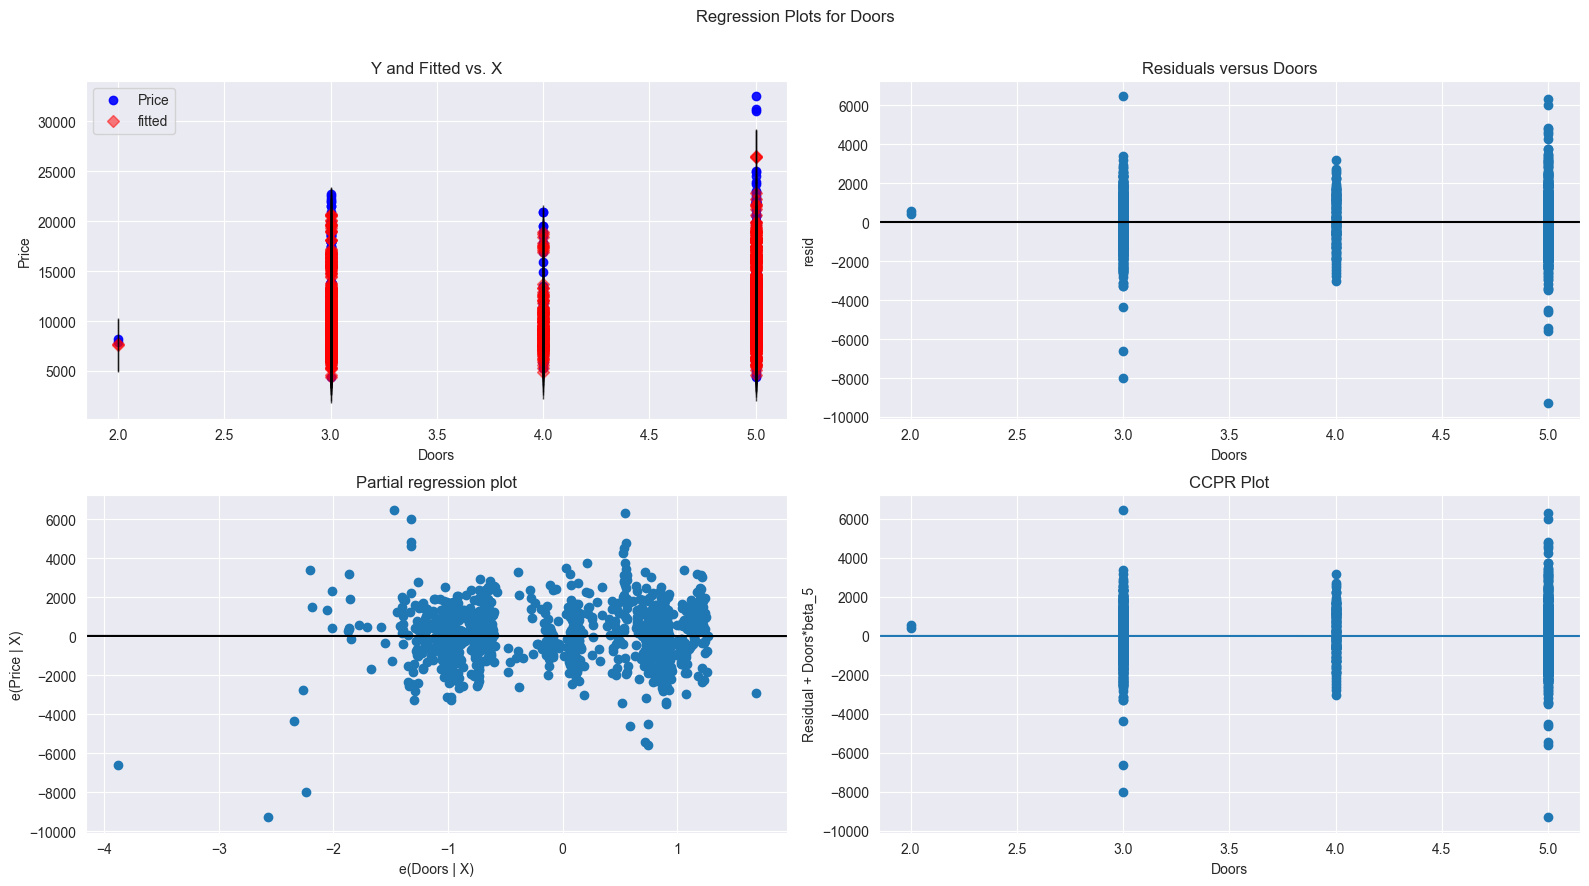

In [29]:
fig = plt.figure(figsize = (16,9))
fig = sm.graphics.plot_regress_exog(model,"Doors" ,fig = fig)
plt.show()

## 7--> Model Deletion Diagnostics:
#### Detecting Influencers/ Outliers

## 1)  Cook's Distance

In [30]:
# import statistical model influencor
from statsmodels.graphics.regressionplots import influence_plot

In [31]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

Text(0, 0.5, 'Cooks Distance')

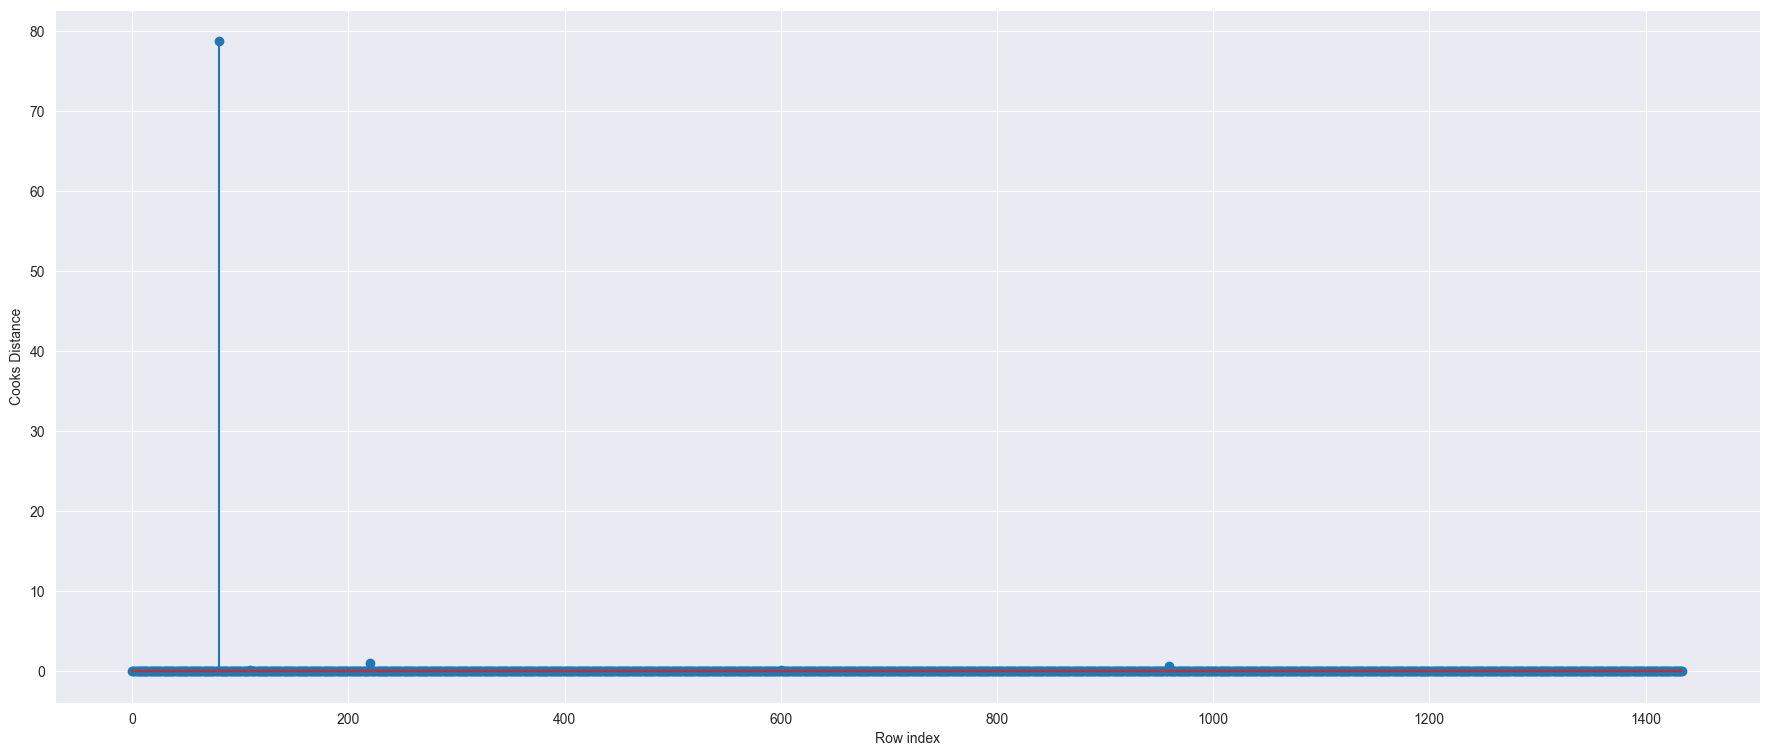

In [32]:
# Plotting of influencers values using Stem Plot
fig = plt.subplots(figsize = (22,9))
plt.stem(np.arange(len(df1_toyota)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [33]:
# Showing the index and value of influencer for which --> c > 0.5
# argmax--> Returns the indices of the maximum values along an axis.
print ("The index of an outlier : ",np.argmax(c), " The value of the outlier is: ",np.max(c))

The index of an outlier :  80  The value of the outlier is:  78.7295058225869


### 2) Leverage value using High Influence points

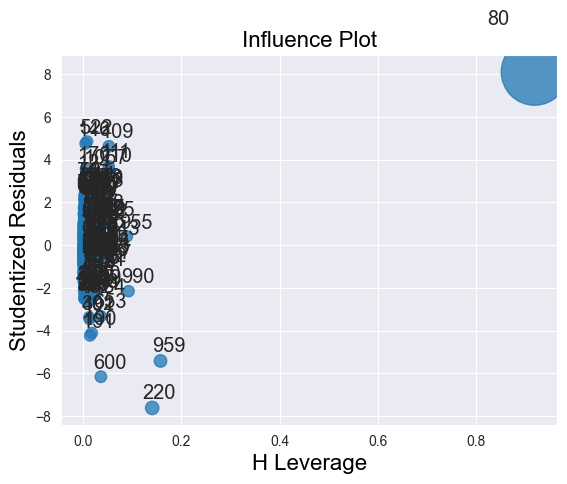

In [34]:
# Points beyond Leverage_cutoff value are influencers
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

#### From the above plot, it is evident that data point 80 is the influencers

In [35]:
# k = no.of features/columns & n = no. of datapoints
k = df1_toyota.shape[1]
n = df1_toyota.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

In [36]:
df1_toyota[df1_toyota.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [37]:
df1_toyota.head()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### 8--> Improving the model

In [38]:
# Load the data 
df1_toyota

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [39]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Toyota1 = df1_toyota.drop(df1_toyota.index[[80]],axis = 0).reset_index()

In [40]:
#Drop the original index column
Toyota1 = Toyota1.drop(['index'],axis=1)

In [41]:
Toyota1 

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


### 9--> Model Deletion Diagnostics and Final model

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:12:16   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
# Considering all possible outliers and c < 0.5
while np.max(c)>0.5:
    model = smf.ols ('Price ~ Age+KM+HP+cc+Doors+QT+Weight',data = Toyota1).fit()
    (c,_) = model.get_influence().cooks_distance
    c
    np.argmax(c), np.max(c) # argmax--> Returns the indices of the maximum values along an axis.
    Toyota1 = Toyota1.drop(Toyota1 .index[[np.argmax(c)]],axis = 0).reset_index(drop =True)
    Toyota1
else:
    final_model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=Toyota1).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [44]:
# for r-squared to be around 90% building a model:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=Toyota1).fit()
        (c,_) = model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        Toyota1 = Toyota1.drop(Toyota1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        Toyota1
    else:
        final_model1 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=Toyota1).fit()
        final_model1.rsquared , final_model1.aic
        print("Thus model accuracy is improved to",final_model1.rsquared)



Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139027
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147553
Thus model accuracy is improved to 0.8949455651565241
Thus model accuracy is improved to 0.8960864004304145
Thus model accuracy is improved to 0.8955820765034092
Thus model accuracy is improved to 0.8930233902806168
Thus model accuracy is impro

In [45]:
 print("Thus model accuracy is improved to",final_model1.rsquared)

Thus model accuracy is improved to 0.9003762532318559


In [46]:
Toyota1

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13750,23,72937,90,2000,3,5,210,1165
1,14950,26,48000,90,2000,3,5,210,1165
2,13750,30,38500,90,2000,3,5,210,1170
3,12950,32,61000,90,2000,3,5,210,1170
4,16900,27,94612,90,2000,3,5,210,1245
...,...,...,...,...,...,...,...,...,...
1325,8450,80,23000,86,1300,3,5,69,1015
1326,7500,69,20544,86,1300,3,5,69,1025
1327,10845,72,19000,86,1300,3,5,69,1015
1328,8500,71,17016,86,1300,3,5,69,1015


### 10 --> Model Predictions

In [47]:
# Prediction with certain random values
new_data=pd.DataFrame({'Age':32,"KM":61000,"HP":90,"cc":2000,"Doors":3,"Gears":5,"QT":210, "Weight":1170},index=[0])
new_data

,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,32,61000,90,2000,3,5,210,1170


In [48]:
final_model1.predict(new_data)

0    14749.534289
dtype: float64

In [49]:
# Prediction of price with 90.037% accuracy:
pred_y = final_model.predict(Toyota1)
pred_y

0       15886.635544
1       15996.318854
2       15883.424182
3       15264.967942
4       17632.593606
            ...     
1325     7582.426188
1326     9161.230587
1327     8536.091326
1328     8681.531063
1329     8793.668694
Length: 1330, dtype: float64